# **Taller 2 - Simulación Computacional 2020-I**

Fecha de entrega: 21 de Septiembre de 2020

## 1. 
Implementar en Notebook Jupyter una red de colas de un Centro de Diagnóstico Automotriz que emiten la revisión técnico-mecánica [<a href="https://drive.google.com/file/d/0B0MRo23s_UhySlJVYU41QlBkaWs/view?usp=sharing">Sec. 5.5.2 Rios08 </a> ]. 

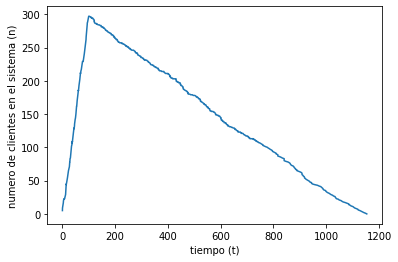

Tiempo medio de los clientes en el sistema:  494.22411900606176
promedio de clientes en el nodo 1 55.48207151956066
promedio de clientes en el nodo 2 43.820854106845616
promedio de clientes en el nodo 3 43.780085406006236
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  1053.6503560509555
Total de clientes maximo:  297
Total de clientes que pasaron por el sistema:  332


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
Xant1 = 236541
#Creando generadores congruenciales
def gen1(): 
  global Xant1
  a = 134775813
  c = 1
  m = 2**32
  Xnext = (a * Xant1 + c) % m
  Xant1 = Xnext
  U = Xnext / m
  return U
#Generador de variables aleatorias distribuidas exponecialmente
def genexponencial(L):
  U=gen1()
  xi = -(math.log(1-U))/float(L)
  return xi
def gennormal(M,D):
  u1=gen1()
  u2=gen1()
  z1=(math.sqrt((-2)*math.log(u1)))*(math.sin(2*math.pi*u2))
  z2=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
  x1=(z1*D)+M
  x2=(z2*D)+M
  if (x1<=0):
    return 0
  else:
    return x1

#Declaración de variables
M=999999
T=100
at=[]
an=[]
t = t_suc = Tp = 0 #tiempo transcurrido de simulacion, t del suceso de un evento, tiempo transcurrido desde T hasta que el ultimo cliente abandona el sistema
T_suc={'t_LL1':M,
       't_S1':M,
       't_S2':M,
       't_S3':M,} #Diccionario de eventos pendientes
N_LL1 = N_LL2 = N_LL3 = N_S1 = N_S2 = N_S3 = n1 = n2 = n3 = 0 #numero de llegadas a cada nodo, numero de salidas de cada nodo, numero de clientes en cada nodo
LL1  = []
LL2  = []
LL3  = []
S1 = []
S2 = []
S3 = [] #instante en el que llega/sale el cliente i a cada servidor
n_med_n1 = n_med_n2 = n_med_n3 = 0 #numero medio de clientes en en servidor ni

u1=2
u2=3
u31=5
u32=3
o1=2
o31=1
o32=3
L=3
# Metodos
def llegada_cliente(t_suc):
  global n_med_n1,n1,t,N_LL1,T,L
  n_med_n1 = n_med_n1+(n1*(t_suc-t))
  n1=n1+1
  N_LL1=N_LL1+1
  LL1.append(t_suc)
  t=t_suc

  Y=genexponencial(L)
  if ((t+Y)<T):
    T_suc['t_LL1']=t+Y
  if (n1==1):
    
    Y=gennormal(u1,o1)
    T_suc['t_S1']=t+Y    
def servicio_nodo1(t_suc):
  global n_med_n1,t,N_S1,S1,n1,n_med_n2,n2,N_LL2,LL2,n_med_n3,n3,N_LL3,at
  n_med_n1 = n_med_n1+(n1*(t_suc-t))
  n1=n1-1
  
  N_S1+=1
  S1.append(t_suc)
  U=gen1()
  if (U<=0.4):
    
    n_med_n2=n_med_n2+(n2*(t_suc-t))
    n2=n2+1
    N_LL2=N_LL2+1
    LL2.append(t_suc)
    if (n2==1):
      Z=genexponencial(u2)
      T_suc['t_S2']=t_suc+Z
  else:
    
    n_med_n3=n_med_n3+(n3*(t_suc-t))
    n3=n3+1
    N_LL3=N_LL3+1
    LL3.append(t_suc)
    if (n3==1):
      W=gennormal(u31,o31)
      T_suc['t_S3']=t_suc+W
  t=t_suc
  at.append(n1+n2+n3)
  an.append(t)
  if (n1>0):
    S=gennormal(u1,o1)
    T_suc['t_S1']=t+S
def servicio_nodo2(t_suc):
  global n_med_n1,t,N_S1,S1,n1,n_med_n2,n2,N_LL2,LL2,n_med_n3,n3,N_LL3,N_S2
  n_med_n2=n_med_n2+(n2*(t_suc-t))
  n2=n2-1
  N_S2=N_S2+1
  S2.append(t_suc)
  if (n2>0):
    Y=genexponencial(u2)
    T_suc['t_S2']=t_suc+Y
  n_med_n3=n_med_n3+(n3*(t_suc-t))
  n3=n3+1
  N_LL3=N_LL3+1
  LL3.append(t_suc)
  if (n3==1):
    W=gennormal(u31,o31)
    T_suc['t_S3']=t_suc+W
  t=t_suc
  at.append(n1+n2+n3)
  an.append(t)
def servicio_nodo3(t_suc):
  global n_med_n3,n3,N_S3,S3,t
  n_med_n3=n_med_n3+(n3*(t_suc-t))
  n3=n3-1
  N_S3=N_S3+1
  S3.append(t_suc)
  if (n3>0):
    if (n3<5):
      R=gennormal(u31,o31)
    else:
      R=gennormal(u32,o32)
    T_suc['t_S3']=t_suc+R
  t=t_suc
  at.append(n1+n2+n3)
  an.append(t)
#Programa principal
X=genexponencial(L)
if (X>T):
  Tp=t_medio_sistema=0
  n_med_n1=n_med_n2=n_med_n3=0
else:
  llegada_cliente(X)
  
  while ((T_suc['t_LL1']!= M) | (T_suc['t_S1']!= M) | (T_suc['t_S2']!= M) | (T_suc['t_S3'] != M)):
    
    if (min(T_suc,key=T_suc.get)=='t_LL1'):
      t_suc=T_suc['t_LL1']
      T_suc['t_LL1']=M
      llegada_cliente(t_suc)
    if (min(T_suc,key=T_suc.get)=='t_S1'):
      
      t_suc=T_suc['t_S1']
      T_suc['t_S1']=M
      servicio_nodo1(t_suc)
    if (min(T_suc,key=T_suc.get)=='t_S2'):
      t_suc=T_suc['t_S2']
      T_suc['t_S2']=M
      servicio_nodo2(t_suc)
    if (min(T_suc,key=T_suc.get)=='t_S3'):
      t_suc=T_suc['t_S3']
      T_suc['t_S3']=M
      servicio_nodo3(t_suc)
Tp=max(0,t-T)
acumulo1=acumulo2=acumulo3=0
ind=0
while ind<N_LL1:
  acumulo1=acumulo1 + S1[ind]-LL1[ind]
  ind+=1
ind=0
while ind<N_LL2:
  acumulo2=acumulo2 + S2[ind]-LL2[ind]
  ind+=1
ind=0
while ind<N_LL3:
  acumulo3=acumulo3 + S3[ind]-LL3[ind]
  ind+=1

t_med_sistema = (acumulo1/float(N_LL1))+((0.4*acumulo2)/float(N_LL2))+(acumulo3/float(N_LL3))
n_med_n1=n_med_n1/t
n_mend_n2=n_med_n2/t
n_med_n3=n_med_n3/t

plt.plot(an,at)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("promedio de clientes en el nodo 1",n_med_n1)
print("promedio de clientes en el nodo 2",n_med_n2)
print("promedio de clientes en el nodo 3",n_med_n3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Total de clientes maximo: ",max(at))
print("Total de clientes que pasaron por el sistema: ",N_LL3)


##2.
Implementar en Notebook Jupyter los siguientes ejemplos de SimPy:

a) <a href="https://simpy.readthedocs.io/en/latest/examples/latency.html">Event Latency</a>

b) <a href="https://simpy.readthedocs.io/en/latest/examples/process_communication.html">Process Communication</a>

c) <a href="https://simpy.readthedocs.io/en/latest/examples/carwash.html">Carwash</a>

d) <a href="https://simpy.readthedocs.io/en/latest/examples/gas_station_refuel.html">Gas Station Refueling</a>

e) <a href="https://simpy.readthedocs.io/en/latest/examples/movie_renege.html">Movie Renege</a>

f) <a href="https://simpy.readthedocs.io/en/latest/examples/machine_shop.html">Machine Shop</a>

In [ ]:
!pip install simpy
#event latency
import simpy


SIM_DURATION = 100


class Cable(object):
    """This class represents the propagation through a cable."""
    def __init__(self, env, delay):
        self.env = env
        self.delay = delay
        self.store = simpy.Store(env)

    def latency(self, value):
        yield self.env.timeout(self.delay)
        self.store.put(value)

    def put(self, value):
        self.env.process(self.latency(value))

    def get(self):
        return self.store.get()


def sender(env, cable):
    """A process which randomly generates messages."""
    while True:
        # wait for next transmission
        yield env.timeout(5)
        cable.put('Sender sent this at %d' % env.now)


def receiver(env, cable):
    """A process which consumes messages."""
    while True:
        # Get event for message pipe
        msg = yield cable.get()
        print('Received this at %d while %s' % (env.now, msg))


# Setup and start the simulation
print('Event Latency')
env = simpy.Environment()

cable = Cable(env, 10)
env.process(sender(env, cable))
env.process(receiver(env, cable))

env.run(until=SIM_DURATION)

In [ ]:
import random

import simpy


RANDOM_SEED = 42
SIM_TIME = 100


class BroadcastPipe(object):
    """A Broadcast pipe that allows one process to send messages to many.

    This construct is useful when message consumers are running at
    different rates than message generators and provides an event
    buffering to the consuming processes.

    The parameters are used to create a new
    :class:`~simpy.resources.store.Store` instance each time
    :meth:`get_output_conn()` is called.

    """
    def __init__(self, env, capacity=simpy.core.Infinity):
        self.env = env
        self.capacity = capacity
        self.pipes = []

    def put(self, value):
        """Broadcast a *value* to all receivers."""
        if not self.pipes:
            raise RuntimeError('There are no output pipes.')
        events = [store.put(value) for store in self.pipes]
        return self.env.all_of(events)  # Condition event for all "events"

    def get_output_conn(self):
        """Get a new output connection for this broadcast pipe.

        The return value is a :class:`~simpy.resources.store.Store`.

        """
        pipe = simpy.Store(self.env, capacity=self.capacity)
        self.pipes.append(pipe)
        return pipe


def message_generator(name, env, out_pipe):
    """A process which randomly generates messages."""
    while True:
        # wait for next transmission
        yield env.timeout(random.randint(6, 10))

        # messages are time stamped to later check if the consumer was
        # late getting them.  Note, using event.triggered to do this may
        # result in failure due to FIFO nature of simulation yields.
        # (i.e. if at the same env.now, message_generator puts a message
        # in the pipe first and then message_consumer gets from pipe,
        # the event.triggered will be True in the other order it will be
        # False
        msg = (env.now, '%s says hello at %d' % (name, env.now))
        out_pipe.put(msg)


def message_consumer(name, env, in_pipe):
    """A process which consumes messages."""
    while True:
        # Get event for message pipe
        msg = yield in_pipe.get()

        if msg[0] < env.now:
            # if message was already put into pipe, then
            # message_consumer was late getting to it. Depending on what
            # is being modeled this, may, or may not have some
            # significance
            print('LATE Getting Message: at time %d: %s received message: %s' %
                  (env.now, name, msg[1]))

        else:
            # message_consumer is synchronized with message_generator
            print('at time %d: %s received message: %s.' %
                  (env.now, name, msg[1]))

        # Process does some other work, which may result in missing messages
        yield env.timeout(random.randint(4, 8))


# Setup and start the simulation
print('Process communication')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# For one-to-one or many-to-one type pipes, use Store
pipe = simpy.Store(env)
env.process(message_generator('Generator A', env, pipe))
env.process(message_consumer('Consumer A', env, pipe))

print('\nOne-to-one pipe communication\n')
env.run(until=SIM_TIME)

# For one-to many use BroadcastPipe
# (Note: could also be used for one-to-one,many-to-one or many-to-many)
env = simpy.Environment()
bc_pipe = BroadcastPipe(env)

env.process(message_generator('Generator A', env, bc_pipe))
env.process(message_consumer('Consumer A', env, bc_pipe.get_output_conn()))
env.process(message_consumer('Consumer B', env, bc_pipe.get_output_conn()))

print('\nOne-to-many pipe communication\n')
env.run(until=SIM_TIME)

In [ ]:
import random

import simpy


RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the carwash
WASHTIME = 5      # Minutes it takes to clean a car
T_INTER = 7       # Create a car every ~7 minutes
SIM_TIME = 20     # Simulation time in minutes


class Carwash(object):
    """A carwash has a limited number of machines (``NUM_MACHINES``) to
    clean cars in parallel.

    Cars have to request one of the machines. When they got one, they
    can start the washing processes and wait for it to finish (which
    takes ``washtime`` minutes).

    """
    def __init__(self, env, num_machines, washtime):
        self.env = env
        self.machine = simpy.Resource(env, num_machines)
        self.washtime = washtime

    def wash(self, car):
        """The washing processes. It takes a ``car`` processes and tries
        to clean it."""
        yield self.env.timeout(WASHTIME)
        print("Carwash removed %d%% of %s's dirt." %
              (random.randint(50, 99), car))


def car(env, name, cw):
    """The car process (each car has a ``name``) arrives at the carwash
    (``cw``) and requests a cleaning machine.

    It then starts the washing process, waits for it to finish and
    leaves to never come back ...

    """
    print('%s arrives at the carwash at %.2f.' % (name, env.now))
    with cw.machine.request() as request:
        yield request

        print('%s enters the carwash at %.2f.' % (name, env.now))
        yield env.process(cw.wash(name))

        print('%s leaves the carwash at %.2f.' % (name, env.now))


def setup(env, num_machines, washtime, t_inter):
    """Create a carwash, a number of initial cars and keep creating cars
    approx. every ``t_inter`` minutes."""
    # Create the carwash
    carwash = Carwash(env, num_machines, washtime)

    # Create 4 initial cars
    for i in range(4):
        env.process(car(env, 'Car %d' % i, carwash))

    # Create more cars while the simulation is running
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2))
        i += 1
        env.process(car(env, 'Car %d' % i, carwash))


# Setup and start the simulation
print('Carwash')

random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_MACHINES, WASHTIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

In [ ]:
import itertools
import random

import simpy


RANDOM_SEED = 42
GAS_STATION_SIZE = 200     # liters
THRESHOLD = 10             # Threshold for calling the tank truck (in %)
FUEL_TANK_SIZE = 50        # liters
FUEL_TANK_LEVEL = [5, 25]  # Min/max levels of fuel tanks (in liters)
REFUELING_SPEED = 2        # liters / second
TANK_TRUCK_TIME = 300      # Seconds it takes the tank truck to arrive
T_INTER = [30, 300]        # Create a car every [min, max] seconds
SIM_TIME = 1000            # Simulation time in seconds


def car(name, env, gas_station, fuel_pump):
    """A car arrives at the gas station for refueling.

    It requests one of the gas station's fuel pumps and tries to get the
    desired amount of gas from it. If the stations reservoir is
    depleted, the car has to wait for the tank truck to arrive.

    """
    fuel_tank_level = random.randint(*FUEL_TANK_LEVEL)
    print('%s arriving at gas station at %.1f' % (name, env.now))
    with gas_station.request() as req:
        start = env.now
        # Request one of the gas pumps
        yield req

        # Get the required amount of fuel
        liters_required = FUEL_TANK_SIZE - fuel_tank_level
        yield fuel_pump.get(liters_required)

        # The "actual" refueling process takes some time
        yield env.timeout(liters_required / REFUELING_SPEED)

        print('%s finished refueling in %.1f seconds.' % (name,
                                                          env.now - start))


def gas_station_control(env, fuel_pump):
    """Periodically check the level of the *fuel_pump* and call the tank
    truck if the level falls below a threshold."""
    while True:
        if fuel_pump.level / fuel_pump.capacity * 100 < THRESHOLD:
            # We need to call the tank truck now!
            print('Calling tank truck at %d' % env.now)
            # Wait for the tank truck to arrive and refuel the station
            yield env.process(tank_truck(env, fuel_pump))

        yield env.timeout(10)  # Check every 10 seconds


def tank_truck(env, fuel_pump):
    """Arrives at the gas station after a certain delay and refuels it."""
    yield env.timeout(TANK_TRUCK_TIME)
    print('Tank truck arriving at time %d' % env.now)
    ammount = fuel_pump.capacity - fuel_pump.level
    print('Tank truck refuelling %.1f liters.' % ammount)
    yield fuel_pump.put(ammount)


def car_generator(env, gas_station, fuel_pump):
    """Generate new cars that arrive at the gas station."""
    for i in itertools.count():
        yield env.timeout(random.randint(*T_INTER))
        env.process(car('Car %d' % i, env, gas_station, fuel_pump))


# Setup and start the simulation
print('Gas Station refuelling')
random.seed(RANDOM_SEED)

# Create environment and start processes
env = simpy.Environment()
gas_station = simpy.Resource(env, 2)
fuel_pump = simpy.Container(env, GAS_STATION_SIZE, init=GAS_STATION_SIZE)
env.process(gas_station_control(env, fuel_pump))
env.process(car_generator(env, gas_station, fuel_pump))

# Execute!
env.run(until=SIM_TIME)

In [ ]:
import collections
import random

import simpy


RANDOM_SEED = 42
TICKETS = 50  # Number of tickets per movie
SIM_TIME = 120  # Simulate until


def moviegoer(env, movie, num_tickets, theater):
    """A moviegoer tries to by a number of tickets (*num_tickets*) for
    a certain *movie* in a *theater*.

    If the movie becomes sold out, she leaves the theater. If she gets
    to the counter, she tries to buy a number of tickets. If not enough
    tickets are left, she argues with the teller and leaves.

    If at most one ticket is left after the moviegoer bought her
    tickets, the *sold out* event for this movie is triggered causing
    all remaining moviegoers to leave.

    """
    with theater.counter.request() as my_turn:
        # Wait until its our turn or until the movie is sold out
        result = yield my_turn | theater.sold_out[movie]

        # Check if it's our turn or if movie is sold out
        if my_turn not in result:
            theater.num_renegers[movie] += 1
            return

        # Check if enough tickets left.
        if theater.available[movie] < num_tickets:
            # Moviegoer leaves after some discussion
            yield env.timeout(0.5)
            return

        # Buy tickets
        theater.available[movie] -= num_tickets
        if theater.available[movie] < 2:
            # Trigger the "sold out" event for the movie
            theater.sold_out[movie].succeed()
            theater.when_sold_out[movie] = env.now
            theater.available[movie] = 0
        yield env.timeout(1)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 6)
        if theater.available[movie]:
            env.process(moviegoer(env, movie, num_tickets, theater))


Theater = collections.namedtuple('Theater', 'counter, movies, available, '
                                            'sold_out, when_sold_out, '
                                            'num_renegers')


# Setup and start the simulation
print('Movie renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Create movie theater
counter = simpy.Resource(env, capacity=1)
movies = ['Python Unchained', 'Kill Process', 'Pulp Implementation']
available = {movie: TICKETS for movie in movies}
sold_out = {movie: env.event() for movie in movies}
when_sold_out = {movie: None for movie in movies}
num_renegers = {movie: 0 for movie in movies}
theater = Theater(counter, movies, available, sold_out, when_sold_out,
                  num_renegers)

# Start process and run
env.process(customer_arrivals(env, theater))
env.run(until=SIM_TIME)

# Analysis/results
for movie in movies:
    if theater.sold_out[movie]:
        print('Movie "%s" sold out %.1f minutes after ticket counter '
              'opening.' % (movie, theater.when_sold_out[movie]))
        print('  Number of people leaving queue when film sold out: %s' %
              theater.num_renegers[movie])

In [ ]:
import random

import simpy


RANDOM_SEED = 42
PT_MEAN = 10.0         # Avg. processing time in minutes
PT_SIGMA = 2.0         # Sigma of processing time
MTTF = 300.0           # Mean time to failure in minutes
BREAK_MEAN = 1 / MTTF  # Param. for expovariate distribution
REPAIR_TIME = 30.0     # Time it takes to repair a machine in minutes
JOB_DURATION = 30.0    # Duration of other jobs in minutes
NUM_MACHINES = 10      # Number of machines in the machine shop
WEEKS = 4              # Simulation time in weeks
SIM_TIME = WEEKS * 7 * 24 * 60  # Simulation time in minutes


def time_per_part():
    """Return actual processing time for a concrete part."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Return time until next failure for a machine."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *repairman* and continues the production
    after the it is repaired.

    A machine has a *name* and a numberof *parts_made* thus far.

    """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Start "working" and "break_machine" processes for this machine.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Produce parts as long as the simulation runs.

        While making a part, the machine may break multiple times.
        Request a repairman when this happens.

        """
        while True:
            # Start making a new part
            done_in = time_per_part()
            while done_in:
                try:
                    # Working on the part
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Set to 0 to exit while loop.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Request a repairman. This will preempt its "other_job".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Part is done.
            self.parts_made += 1

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Only break the machine if it is currently working.
                self.process.interrupt()


def other_jobs(env, repairman):
    """The repairman's other (unimportant) job."""
    while True:
        # Start a new job
        done_in = JOB_DURATION
        while done_in:
            # Retry the job until it is done.
            # It's priority is lower than that of machine repairs.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Setup and start the simulation
print('Machine shop')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Machine %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

# Execute!
env.run(until=SIM_TIME)

# Analyis/results
print('Machine shop results after %s weeks' % WEEKS)
for machine in machines:
    print('%s made %d parts.' % (machine.name, machine.parts_made))

##3.
Implementar una red de colas como la del punto 1 ([<a href="https://drive.google.com/file/d/0B0MRo23s_UhySlJVYU41QlBkaWs/view?usp=sharing">Sec. 5.5.2 Rios08 </a> ]) usando SimPy.